In [115]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [116]:
df = pd.read_csv("../../../files/df_nulos_imputados.csv", index_col=0)

In [117]:
df.head()

,EmployeeID,Age,Gender,MaritalStatus,DateBirth,Education,EducationField,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,OverTime,DistanceFromHome,RemoteWork,BusinessTravel,TrainingTimesLastYear,JobRole,JobLevel,DailyRate,HourlyRate,MonthlyRate,PercentSalaryHike,StockOptionLevel,Salary
0,162,51,Male,Unknown,1972,3,Unknown,7,11.144344,20,15,15,1,3,3,3.000000,3,3.0,No,0.000000,6,1,Unknown,5,research director,5,684.0,51.0,6462.0,13,0,1000000000
1,259,52,Male,Unknown,1971,4,Life Sciences,0,34.000000,33,11,9,1,3,1,3.000000,2,3.0,No,0.265372,1,1,Unknown,5,manager,5,699.0,65.0,5678.0,14,1,1000000000
2,319,42,Male,Married,1981,2,Technical Degree,1,22.000000,22,11,15,1,4,4,2.787874,3,3.0,No,0.000000,4,1,travel_rarely,3,manager,5,532.0,58.0,4933.0,11,0,1000000000
3,nan1,47,Female,Married,1976,4,Medical,3,10.844380,20,5,6,1,3,2,2.793950,3,3.0,No,0.257984,2,0,travel_rarely,2,research director,4,359.0,82.0,26703.0,19,2,1000000000
4,nan2,46,Female,Divorced,1977,3,Technical Degree,2,11.732127,19,2,8,1,1,4,3.000000,4,3.0,No,0.000000,3,0,Unknown,5,sales executive,4,1319.0,45.0,7739.0,12,1,1000000000


In [118]:
df['OverallSatisfaction'] = df.apply(lambda x: int(round((x['EnvironmentSatisfaction'] + x['JobSatisfaction'] + x['RelationshipSatisfaction']) / 3 , 0)), axis=1)

In [119]:
df['OverallSatisfaction'].isna().sum()

0

In [123]:
df['OverallSatisfaction'].unique()

array([2, 3, 1, 4])

In [124]:
df['TestGroup'] = df['OverallSatisfaction'].apply(lambda x : 'satisfechos' if x >= 3 else 'insatisfechos')

In [125]:
df.head(5)

,EmployeeID,Age,Gender,MaritalStatus,DateBirth,Education,EducationField,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,OverTime,DistanceFromHome,RemoteWork,BusinessTravel,TrainingTimesLastYear,JobRole,JobLevel,DailyRate,HourlyRate,MonthlyRate,PercentSalaryHike,StockOptionLevel,Salary,OverallSatisfaction,TestGroup
0,162,51,Male,Unknown,1972,3,Unknown,7,11.144344,20,15,15,1,3,3,3.000000,3,3.0,No,0.000000,6,1,Unknown,5,research director,5,684.0,51.0,6462.0,13,0,1000000000,2,insatisfechos
1,259,52,Male,Unknown,1971,4,Life Sciences,0,34.000000,33,11,9,1,3,1,3.000000,2,3.0,No,0.265372,1,1,Unknown,5,manager,5,699.0,65.0,5678.0,14,1,1000000000,2,insatisfechos
2,319,42,Male,Married,1981,2,Technical Degree,1,22.000000,22,11,15,1,4,4,2.787874,3,3.0,No,0.000000,4,1,travel_rarely,3,manager,5,532.0,58.0,4933.0,11,0,1000000000,3,satisfechos
3,nan1,47,Female,Married,1976,4,Medical,3,10.844380,20,5,6,1,3,2,2.793950,3,3.0,No,0.257984,2,0,travel_rarely,2,research director,4,359.0,82.0,26703.0,19,2,1000000000,2,insatisfechos
4,nan2,46,Female,Divorced,1977,3,Technical Degree,2,11.732127,19,2,8,1,1,4,3.000000,4,3.0,No,0.000000,3,0,Unknown,5,sales executive,4,1319.0,45.0,7739.0,12,1,1000000000,2,insatisfechos


In [126]:
tabla_contingencia_porcentaje = pd.crosstab(df['TestGroup'], df['Attrition'], normalize = True) * 100
tabla_contingencia = pd.crosstab(df['TestGroup'], df['Attrition']) 
tabla_contingencia

Attrition,No,Yes
TestGroup,,
insatisfechos,912,187
satisfechos,399,65


In [131]:
tabla_contingencia_porcentaje

Attrition,No,Yes
TestGroup,,
insatisfechos,58.349328,11.964171
satisfechos,25.527831,4.158669


H0 = No existe diferencia signiticativa entre ambos grupos

H1 = Existe diferencia significativa entre ambos grupos

p-value < 0.05 rechazamos h0

p-value > 0.05 aceptamos h0

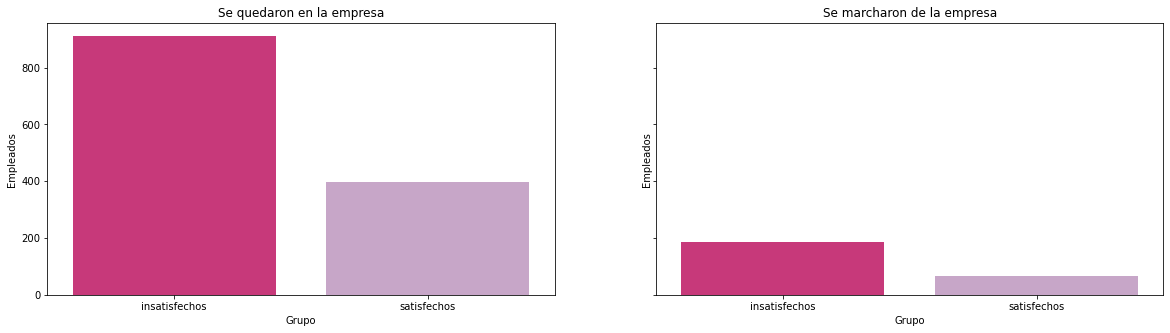

In [132]:
# hacemos un análisis visual previo
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5), sharey=True)

sns.barplot(x=tabla_contingencia.index, y="No", data=tabla_contingencia,  palette = "PuRd_r", ax = axes[0])
sns.barplot(x=tabla_contingencia.index, y="Yes", data=tabla_contingencia,  palette = "PuRd_r", ax = axes[1])

axes[0].set_title("Se quedaron en la empresa")
axes[1].set_title("Se marcharon de la empresa")

axes[0].set_xlabel("Grupo")
axes[0].set_ylabel("Empleados")

axes[1].set_xlabel("Grupo")
axes[1].set_ylabel("Empleados");

In [134]:
# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(tabla_contingencia)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print(f"Con un p_value de {p_value} hay una diferencia significativa en la cantidad de attrition según el grupo")
else:
    print(f"Con un p_value de {p_value} no hay una diferencia significativa en la cantidad de attrition según el grupo")

Con un p_value de 0.16103114852144051 no hay una diferencia significativa en la cantidad de attrition según el grupo


**Análisis**: 
- No podemos rechazar la hipótesis nula, ya que no existe una diferencia signiticativa entre ambos grupos (satisfechos e insatisfechos)
- Observamos que hay una elevada cantidad de empleados comprendidos dentro de 'insatisfechos'
- A priori sí vemos una ligera diferencia en el attrition según el grupo al que pertenecen los empleados, pero al realizar el análisis (y dado el posible impacto del total de insatisfechos) esta diferencia no resulta ser significativa
- Recomendaríamos a la empresa ahondar en los motivos de la insatisfacción de sus empleados para encontrar vías de mejora
- Next Steps: Cruzar la variable Attrition con otras (p.e: HourlyRate , RemoteWork , DistanceFromHome , YearsWithCurrManager , YearsSinceLastPromotion, OverTime, JobInvolvement, WorkLifeBalance, BusinessTravel, JobRole)